<a href="https://colab.research.google.com/github/cyberedjs/quant/blob/master/Portfolio_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**01 Intial Data from yfinance**
- Initially we gathered the ticker list from wikipedia
- Using that ticker list we grabbed the data for all the tickers from yahoo finance
- Saved the file on the computer for future use



In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/3-1

/content/drive/MyDrive/Colab Notebooks/3-1


In [2]:
# pandas for dealing with DataFrames
import pandas as pd
# request library
import requests
# yfinance is where we will pull our data from
import yfinance as yf
# numpy for using mathematical functions
import numpy as np
# matplotlib for visualization
import matplotlib.pyplot as plt

In [10]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
tickers = pd.read_html(r.text)[0]
tickers.head()

tickers = tickers.Symbol.to_list()
tickers = [i.replace('.', '-') for i in tickers]

tickers = pd.DataFrame(tickers)
tickers.to_csv("./csvs/tickers_spy.csv", index = None)

tickers = pd.read_csv("./csvs/tickers_spy.csv")
tickers = tickers.values.tolist()
flat_tickers = [item for sublist in tickers for item in sublist]

In [11]:
stocks = yf.download(flat_tickers, start = '2015-01-01', end = '2023-05-23')
stocks

[*********************100%***********************]  503 of 503 completed


Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2015-01-02   37.823864  51.079910  146.459595   24.531759   46.113232   
2015-01-05   37.115124  51.051495  144.529068   23.840664   45.245426   
2015-01-06   36.536942  50.255589  144.427460   23.842915   45.021461   
2015-01-07   37.021873  50.227165  147.531067   24.177240   46.841087   
2015-01-08   38.131607  50.843048  148.824219   25.106186   47.330982   
...                ...        ...         ...         ...         ...   
2023-05-16  126.290001  14.200000  117.339996  172.070007  143.289993   
2023-05-17  127.769997  14.910000  122.099998  172.690002  143.350006   
2023-05-18  129.139999  15.050000  121.480003  175.050003  143.440002   
2023-05-19  128.869995  14.820000  117.410004  175.160004  145.110001   
2023-05-22  129.089996  14.380000  119.440002  174.199997  144.899994   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2015-01-02   79.136955   38.241344  19.496668   77.119667   72.339996  ...   
2015-01-05   78.463348   38.249855  19.379999   75.817551   71.980003  ...   
2015-01-06   78.892014   37.815483  19.423332   75.270683   70.529999  ...   
2015-01-07   80.466728   38.122101  19.536667   76.850571   71.110001  ...   
2015-01-08   80.650421   38.905659  19.876667   78.022476   72.919998  ...   
...                ...         ...        ...         ...         ...  ...   
2023-05-16  174.600006  109.389999  74.519997  279.190002  345.109985  ...   
2023-05-17  174.789993  108.820000  73.040001  284.630005  356.630005  ...   
2023-05-18  174.820007  108.470001  75.300003  287.480011  360.429993  ...   
2023-05-19  173.389999  108.930000  76.019997  289.910004  371.250000  ...   
2023-05-22  172.250000  108.250000  73.500000  290.950012  372.049988  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2015-01-02  2228900  2534900  10220400  1825800   605900  2283466   936579   
2015-01-05  1695100  3107200  18502400  1469800  1369900  4418651  2223873   
2015-01-06  1975800  4749600  16670700  1988400  1333200  5004401  1835563   
2015-01-07  1472000  2833400  13590700   959800  1038600  4554134  1505860   
2015-01-08  1676600  2516800  15487500  1409500   821800  4258268  1449004   
...             ...      ...       ...      ...      ...      ...      ...   
2023-05-16  2382700  1770200  14795200   690500  1603300  1572200   929400   
2023-05-17  5680500  2118000  14064700  2938800  1957400  1690400  1071500   
2023-05-18  2459100  2403900  12005600   938900  1087500  1435400  1132800   
2023-05-19  1921300  2068500  13357700  1023900  1843400  1295400  2357000   
2023-05-22  1733500  1857400  12882000  2880800   845600  1644400  1244300   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2015-01-02  411800  2298700  1784200  
2015-01-05  420300  5326000  3112100  
2015-01-06  527500  9086500  3977200  
2015-01-07  467800  2759900  2481800  
2015-01-08  324400  1831500  3121300  
...            ...      ...      ...  
2023-05-16  183700  4717200  1175300  
2023-05-17  227400  9082400  1714500  
2023-05-18  360600  9029700  1836600  
2023-05-19  419300  7295900  1755200  
2023-05-22  256600  8414900  1911400  

[2111 rows x 3018 columns]

In [12]:
stocks.to_csv("./csvs/stocks_spy_data.csv")
stocks = stocks.loc[:,'Adj Close']
stocks

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,37.823864,51.079910,146.459595,24.531759,46.113232,79.136955,38.241344,19.496668,77.119667,72.339996,...,129.343094,28.097223,63.172081,48.605167,34.251156,44.513100,102.393494,77.430000,23.403790,40.864922
2015-01-05,37.115124,51.051495,144.529068,23.840664,45.245426,78.463348,38.249855,19.379999,75.817551,71.980003,...,127.141747,27.778292,61.443596,48.268208,32.119450,43.608704,106.213104,76.339996,22.526865,40.619595
2015-01-06,36.536942,50.255589,144.427460,23.842915,45.021461,78.892014,37.815483,19.423332,75.270683,70.529999,...,124.429695,27.926085,61.116936,47.669189,31.930573,43.073437,105.312805,75.790001,21.666498,40.223316
2015-01-07,37.021873,50.227165,147.531067,24.177240,46.841087,80.466728,38.122101,19.536667,76.850571,71.110001,...,128.083939,28.167229,61.736187,48.904675,32.182415,44.500809,107.931969,77.720001,21.873312,41.053631
2015-01-08,38.131607,50.843048,148.824219,25.106186,47.330982,80.650421,38.905659,19.876667,78.022476,72.919998,...,129.624893,28.493942,62.763775,50.112087,32.425266,45.276020,109.077827,79.379997,22.179415,41.685810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,126.290001,14.200000,117.339996,172.070007,143.289993,174.600006,109.389999,74.519997,279.190002,345.109985,...,102.816391,66.589996,102.519997,40.419998,103.260002,138.779999,134.839996,266.380005,23.350000,181.449997
2023-05-17,127.769997,14.910000,122.099998,172.690002,143.350006,174.789993,108.820000,73.040001,284.630005,356.630005,...,108.673080,66.040001,104.820000,40.139999,103.949997,137.220001,134.330002,271.670013,26.170000,178.940002
2023-05-18,129.139999,15.050000,121.480003,175.050003,143.440002,174.820007,108.470001,75.300003,287.480011,360.429993,...,110.049957,65.870003,105.769997,40.500000,104.430000,138.449997,135.020004,279.329987,27.240000,179.720001


In [13]:
stocks.to_csv("./csvs/stocks_spy_adj_close.csv")

**Making a Database of Individual Ticker**

- Dropped all the columns with threshold value 3085 i-e all the companies which came to market after 2010-01-010

- Dropped all the null values
- Made individual ticker database for later use
- Added percent change and Normalized Adjusted Close columns in the database

In [90]:
# Ignoring Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas_datareader.data as web
import pandas as pd
from yahoo_fin import stock_info as si
import datetime as dt

# yfinance is where we will pull our data from
import yfinance as yf

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

<ipython-input-16-cabc036f182f>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [70]:
# Reading the stocks_spy_data.csv
stocks = pd.read_csv("./csvs/stocks_spy_data.csv", header = [0,1], index_col = [0], parse_dates = [0])
stocks

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2015-01-02   37.823864  51.079910  146.459595   24.531759   46.113232   
2015-01-05   37.115124  51.051495  144.529068   23.840664   45.245426   
2015-01-06   36.536942  50.255589  144.427460   23.842915   45.021461   
2015-01-07   37.021873  50.227165  147.531067   24.177240   46.841087   
2015-01-08   38.131607  50.843048  148.824219   25.106186   47.330982   
...                ...        ...         ...         ...         ...   
2023-05-16  126.290001  14.200000  117.339996  172.070007  143.289993   
2023-05-17  127.769997  14.910000  122.099998  172.690002  143.350006   
2023-05-18  129.139999  15.050000  121.480003  175.050003  143.440002   
2023-05-19  128.869995  14.820000  117.410004  175.160004  145.110001   
2023-05-22  129.089996  14.380000  119.440002  174.199997  144.899994   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2015-01-02   79.136955   38.241344  19.496668   77.119667   72.339996  ...   
2015-01-05   78.463348   38.249855  19.379999   75.817551   71.980003  ...   
2015-01-06   78.892014   37.815483  19.423332   75.270683   70.529999  ...   
2015-01-07   80.466728   38.122101  19.536667   76.850571   71.110001  ...   
2015-01-08   80.650421   38.905659  19.876667   78.022476   72.919998  ...   
...                ...         ...        ...         ...         ...  ...   
2023-05-16  174.600006  109.389999  74.519997  279.190002  345.109985  ...   
2023-05-17  174.789993  108.820000  73.040001  284.630005  356.630005  ...   
2023-05-18  174.820007  108.470001  75.300003  287.480011  360.429993  ...   
2023-05-19  173.389999  108.930000  76.019997  289.910004  371.250000  ...   
2023-05-22  172.250000  108.250000  73.500000  290.950012  372.049988  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2015-01-02  2228900  2534900  10220400  1825800   605900  2283466   936579   
2015-01-05  1695100  3107200  18502400  1469800  1369900  4418651  2223873   
2015-01-06  1975800  4749600  16670700  1988400  1333200  5004401  1835563   
2015-01-07  1472000  2833400  13590700   959800  1038600  4554134  1505860   
2015-01-08  1676600  2516800  15487500  1409500   821800  4258268  1449004   
...             ...      ...       ...      ...      ...      ...      ...   
2023-05-16  2382700  1770200  14795200   690500  1603300  1572200   929400   
2023-05-17  5680500  2118000  14064700  2938800  1957400  1690400  1071500   
2023-05-18  2459100  2403900  12005600   938900  1087500  1435400  1132800   
2023-05-19  1921300  2068500  13357700  1023900  1843400  1295400  2357000   
2023-05-22  1733500  1857400  12882000  2880800   845600  1644400  1244300   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2015-01-02  411800  2298700  1784200  
2015-01-05  420300  5326000  3112100  
2015-01-06  527500  9086500  3977200  
2015-01-07  467800  2759900  2481800  
2015-01-08  324400  1831500  3121300  
...            ...      ...      ...  
2023-05-16  183700  4717200  1175300  
2023-05-17  227400  9082400  1714500  
2023-05-18  360600  9029700  1836600  
2023-05-19  419300  7295900  1755200  
2023-05-22  256600  8414900  1911400  

[2111 rows x 3018 columns]

In [71]:
stocks.dropna(axis=1, inplace=True)

In [72]:
stocks.shape

(2111, 2868)

In [73]:
stocks

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2015-01-02   37.823864  51.079910  146.459595   24.531759   46.113232   
2015-01-05   37.115124  51.051495  144.529068   23.840664   45.245426   
2015-01-06   36.536942  50.255589  144.427460   23.842915   45.021461   
2015-01-07   37.021873  50.227165  147.531067   24.177240   46.841087   
2015-01-08   38.131607  50.843048  148.824219   25.106186   47.330982   
...                ...        ...         ...         ...         ...   
2023-05-16  126.290001  14.200000  117.339996  172.070007  143.289993   
2023-05-17  127.769997  14.910000  122.099998  172.690002  143.350006   
2023-05-18  129.139999  15.050000  121.480003  175.050003  143.440002   
2023-05-19  128.869995  14.820000  117.410004  175.160004  145.110001   
2023-05-22  129.089996  14.380000  119.440002  174.199997  144.899994   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2015-01-02   79.136955   38.241344  19.496668   77.119667   72.339996  ...   
2015-01-05   78.463348   38.249855  19.379999   75.817551   71.980003  ...   
2015-01-06   78.892014   37.815483  19.423332   75.270683   70.529999  ...   
2015-01-07   80.466728   38.122101  19.536667   76.850571   71.110001  ...   
2015-01-08   80.650421   38.905659  19.876667   78.022476   72.919998  ...   
...                ...         ...        ...         ...         ...  ...   
2023-05-16  174.600006  109.389999  74.519997  279.190002  345.109985  ...   
2023-05-17  174.789993  108.820000  73.040001  284.630005  356.630005  ...   
2023-05-18  174.820007  108.470001  75.300003  287.480011  360.429993  ...   
2023-05-19  173.389999  108.930000  76.019997  289.910004  371.250000  ...   
2023-05-22  172.250000  108.250000  73.500000  290.950012  372.049988  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2015-01-02  2228900  2534900  10220400  1825800   605900  2283466   936579   
2015-01-05  1695100  3107200  18502400  1469800  1369900  4418651  2223873   
2015-01-06  1975800  4749600  16670700  1988400  1333200  5004401  1835563   
2015-01-07  1472000  2833400  13590700   959800  1038600  4554134  1505860   
2015-01-08  1676600  2516800  15487500  1409500   821800  4258268  1449004   
...             ...      ...       ...      ...      ...      ...      ...   
2023-05-16  2382700  1770200  14795200   690500  1603300  1572200   929400   
2023-05-17  5680500  2118000  14064700  2938800  1957400  1690400  1071500   
2023-05-18  2459100  2403900  12005600   938900  1087500  1435400  1132800   
2023-05-19  1921300  2068500  13357700  1023900  1843400  1295400  2357000   
2023-05-22  1733500  1857400  12882000  2880800   845600  1644400  1244300   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2015-01-02  411800  2298700  1784200  
2015-01-05  420300  5326000  3112100  
2015-01-06  527500  9086500  3977200  
2015-01-07  467800  2759900  2481800  
2015-01-08  324400  1831500  3121300  
...            ...      ...      ...  
2023-05-16  183700  4717200  1175300  
2023-05-17  227400  9082400  1714500  
2023-05-18  360600  9029700  1836600  
2023-05-19  419300  7295900  1755200  
2023-05-22  256600  8414900  1911400  

[2111 rows x 2868 columns]

In [74]:
# Lets save the stocks of 443 stocks in to csv
stocks.to_csv("./csvs/stocks_spy_updated.csv")

In [75]:
# Make a new ticker list with 443 stocks which has thresh = 3085
tickers = list(stocks['Adj Close'].columns)
# saving into csv
tickers = pd.DataFrame(tickers)
tickers.to_csv("./csvs/tickers_updated.csv", index = None)

In [76]:
# converting it back into list for use in the for loop
#tickers = tickers[0].values.tolist()
tickers = list(stocks['Adj Close'].columns)
ticker = [item for sublist in tickers for item in sublist]

# Lets make a a separate dataframe for every column separately for all the tickers
stocks_adj_close = stocks['Adj Close'][:]
stocks_adj_close.to_csv("./csvs/stocks_adj_close.csv")
stocks_close = stocks['Close'][:]
stocks_close.to_csv("./csvs/stocks_close.csv")
stocks_volume = stocks['Volume'][:]
stocks_volume.to_csv("./csvs/stocks_volume.csv")
stocks_high = stocks['High'][:]
stocks_high.to_csv("./csvs/stocks_high.csv")
stocks_low = stocks['Low'][:]
stocks_low.to_csv("./csvs/stocks_low.csv")
stocks_open = stocks['Open'][:]
stocks_open.to_csv("./csvs/stocks_open.csv")

# initiating a list of columns 
columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'Percent Change']

# Creating csv files for individual stocks with first column to be Adj Close
for ticker in tickers:
    df = stocks_adj_close[ticker]
    df.to_csv(f'./stock_data/{ticker}.csv')

# Merging all the columns for individual tickers
for ticker in tickers:
    df = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    df.rename(columns = {ticker : "Adj Close"}, inplace = True)
    df = pd.merge(df,stocks[columns[0]][ticker],left_on='Date',right_on='Date',how='right')
    df = pd.merge(df,stocks[columns[1]][ticker],left_on='Date',right_on='Date',how='right')
    df = pd.merge(df,stocks[columns[2]][ticker],left_on='Date',right_on='Date',how='right')
    df = pd.merge(df,stocks[columns[3]][ticker],left_on='Date',right_on='Date',how='right')
    df = pd.merge(df,stocks[columns[4]][ticker],left_on='Date',right_on='Date',how='right')
    df['Percent Change'] = df['Adj Close'].pct_change()
    
    df.to_csv(f'stock_data/{ticker}.csv')

# Renaming the columns from Columns list
for ticker in tickers:
    df = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0])
    for i in range(0, len(columns)-1):
        df.rename(columns={df.columns[i+1]: columns[i]},inplace=True)
    df.to_csv(f'stock_data/{ticker}.csv')

In [77]:
stocks

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2015-01-02   37.823864  51.079910  146.459595   24.531759   46.113232   
2015-01-05   37.115124  51.051495  144.529068   23.840664   45.245426   
2015-01-06   36.536942  50.255589  144.427460   23.842915   45.021461   
2015-01-07   37.021873  50.227165  147.531067   24.177240   46.841087   
2015-01-08   38.131607  50.843048  148.824219   25.106186   47.330982   
...                ...        ...         ...         ...         ...   
2023-05-16  126.290001  14.200000  117.339996  172.070007  143.289993   
2023-05-17  127.769997  14.910000  122.099998  172.690002  143.350006   
2023-05-18  129.139999  15.050000  121.480003  175.050003  143.440002   
2023-05-19  128.869995  14.820000  117.410004  175.160004  145.110001   
2023-05-22  129.089996  14.380000  119.440002  174.199997  144.899994   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2015-01-02   79.136955   38.241344  19.496668   77.119667   72.339996  ...   
2015-01-05   78.463348   38.249855  19.379999   75.817551   71.980003  ...   
2015-01-06   78.892014   37.815483  19.423332   75.270683   70.529999  ...   
2015-01-07   80.466728   38.122101  19.536667   76.850571   71.110001  ...   
2015-01-08   80.650421   38.905659  19.876667   78.022476   72.919998  ...   
...                ...         ...        ...         ...         ...  ...   
2023-05-16  174.600006  109.389999  74.519997  279.190002  345.109985  ...   
2023-05-17  174.789993  108.820000  73.040001  284.630005  356.630005  ...   
2023-05-18  174.820007  108.470001  75.300003  287.480011  360.429993  ...   
2023-05-19  173.389999  108.930000  76.019997  289.910004  371.250000  ...   
2023-05-22  172.250000  108.250000  73.500000  290.950012  372.049988  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2015-01-02  2228900  2534900  10220400  1825800   605900  2283466   936579   
2015-01-05  1695100  3107200  18502400  1469800  1369900  4418651  2223873   
2015-01-06  1975800  4749600  16670700  1988400  1333200  5004401  1835563   
2015-01-07  1472000  2833400  13590700   959800  1038600  4554134  1505860   
2015-01-08  1676600  2516800  15487500  1409500   821800  4258268  1449004   
...             ...      ...       ...      ...      ...      ...      ...   
2023-05-16  2382700  1770200  14795200   690500  1603300  1572200   929400   
2023-05-17  5680500  2118000  14064700  2938800  1957400  1690400  1071500   
2023-05-18  2459100  2403900  12005600   938900  1087500  1435400  1132800   
2023-05-19  1921300  2068500  13357700  1023900  1843400  1295400  2357000   
2023-05-22  1733500  1857400  12882000  2880800   845600  1644400  1244300   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2015-01-02  411800  2298700  1784200  
2015-01-05  420300  5326000  3112100  
2015-01-06  527500  9086500  3977200  
2015-01-07  467800  2759900  2481800  
2015-01-08  324400  1831500  3121300  
...            ...      ...      ...  
2023-05-16  183700  4717200  1175300  
2023-05-17  227400  9082400  1714500  
2023-05-18  360600  9029700  1836600  
2023-05-19  419300  7295900  1755200  
2023-05-22  256600  8414900  1911400  

[2111 rows x 2868 columns]

In [78]:
stocks_adj_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,37.823864,51.079910,146.459595,24.531759,46.113232,79.136955,38.241344,19.496668,77.119667,72.339996,...,129.343094,28.097223,63.172081,48.605167,34.251156,44.513100,102.393494,77.430000,23.403790,40.864922
2015-01-05,37.115124,51.051495,144.529068,23.840664,45.245426,78.463348,38.249855,19.379999,75.817551,71.980003,...,127.141747,27.778292,61.443596,48.268208,32.119450,43.608704,106.213104,76.339996,22.526865,40.619595
2015-01-06,36.536942,50.255589,144.427460,23.842915,45.021461,78.892014,37.815483,19.423332,75.270683,70.529999,...,124.429695,27.926085,61.116936,47.669189,31.930573,43.073437,105.312805,75.790001,21.666498,40.223316
2015-01-07,37.021873,50.227165,147.531067,24.177240,46.841087,80.466728,38.122101,19.536667,76.850571,71.110001,...,128.083939,28.167229,61.736187,48.904675,32.182415,44.500809,107.931969,77.720001,21.873312,41.053631
2015-01-08,38.131607,50.843048,148.824219,25.106186,47.330982,80.650421,38.905659,19.876667,78.022476,72.919998,...,129.624893,28.493942,62.763775,50.112087,32.425266,45.276020,109.077827,79.379997,22.179415,41.685810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,126.290001,14.200000,117.339996,172.070007,143.289993,174.600006,109.389999,74.519997,279.190002,345.109985,...,102.816391,66.589996,102.519997,40.419998,103.260002,138.779999,134.839996,266.380005,23.350000,181.449997
2023-05-17,127.769997,14.910000,122.099998,172.690002,143.350006,174.789993,108.820000,73.040001,284.630005,356.630005,...,108.673080,66.040001,104.820000,40.139999,103.949997,137.220001,134.330002,271.670013,26.170000,178.940002
2023-05-18,129.139999,15.050000,121.480003,175.050003,143.440002,174.820007,108.470001,75.300003,287.480011,360.429993,...,110.049957,65.870003,105.769997,40.500000,104.430000,138.449997,135.020004,279.329987,27.240000,179.720001


In [79]:
# As you can see all the stocks are not starting from same y value, 
# lets normalize the data and then plot and see the price fluctuations
# we will divide every row by the first row and multiply by 100 to covert it into %
# for example the following code is printing the normalized values of first column
# Lets normalize all the columns
norm_adj_close = (stocks_adj_close/(stocks_adj_close.iloc[0]))*100
norm_adj_close.head()

# Merging into Database
for ticker in tickers:
    df = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    df['Normalized Adj Close'] = norm_adj_close[ticker]
    df.to_csv(f'stock_data/{ticker}.csv')

**03 Picking the Best Performers**
- From these stocks we compared each stocks returns over the S&P return over the exact same time period
- This gave us a ratio of each stocks return over the S&Ps return as a whole
- We then took the top 30% performers to analyze for creating the portfolios.
- *We* now had a group of 133 companies to analyze allowing for faster and more accurate analysis in terms of profitability.



In [80]:
import pandas_datareader as web
import pandas as pd

In [81]:
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")


# Reading the stocks_adj_close.csv
stocks = pd.read_csv("./csvs/stocks_adj_close.csv", index_col = [0], parse_dates = [0])
stocks

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,37.823864,51.079910,146.459595,24.531759,46.113232,79.136955,38.241344,19.496668,77.119667,72.339996,...,129.343094,28.097223,63.172081,48.605167,34.251156,44.513100,102.393494,77.430000,23.403790,40.864922
2015-01-05,37.115124,51.051495,144.529068,23.840664,45.245426,78.463348,38.249855,19.379999,75.817551,71.980003,...,127.141747,27.778292,61.443596,48.268208,32.119450,43.608704,106.213104,76.339996,22.526865,40.619595
2015-01-06,36.536942,50.255589,144.427460,23.842915,45.021461,78.892014,37.815483,19.423332,75.270683,70.529999,...,124.429695,27.926085,61.116936,47.669189,31.930573,43.073437,105.312805,75.790001,21.666498,40.223316
2015-01-07,37.021873,50.227165,147.531067,24.177240,46.841087,80.466728,38.122101,19.536667,76.850571,71.110001,...,128.083939,28.167229,61.736187,48.904675,32.182415,44.500809,107.931969,77.720001,21.873312,41.053631
2015-01-08,38.131607,50.843048,148.824219,25.106186,47.330982,80.650421,38.905659,19.876667,78.022476,72.919998,...,129.624893,28.493942,62.763775,50.112087,32.425266,45.276020,109.077827,79.379997,22.179415,41.685810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-16,126.290001,14.200000,117.339996,172.070007,143.289993,174.600006,109.389999,74.519997,279.190002,345.109985,...,102.816391,66.589996,102.519997,40.419998,103.260002,138.779999,134.839996,266.380005,23.350000,181.449997
2023-05-17,127.769997,14.910000,122.099998,172.690002,143.350006,174.789993,108.820000,73.040001,284.630005,356.630005,...,108.673080,66.040001,104.820000,40.139999,103.949997,137.220001,134.330002,271.670013,26.170000,178.940002
2023-05-18,129.139999,15.050000,121.480003,175.050003,143.440002,174.820007,108.470001,75.300003,287.480011,360.429993,...,110.049957,65.870003,105.769997,40.500000,104.430000,138.449997,135.020004,279.329987,27.240000,179.720001


In [91]:
import yfinance as yf
yf.pdr_override()

In [92]:
# Getting the tickers list
tickers = list(stocks.columns)
start = '2019-11-21'
end = '2023-05-20'

# Load sp500_df return data for comparing the returns of individual stocks
sp500_df = web.DataReader('^GSPC',start, end)
sp500_df['Percent Change'] = sp500_df['Adj Close'].pct_change()
sp500_return = (sp500_df['Percent Change'] + 1).cumprod()[-1]


[*********************100%***********************]  1 of 1 completed


In [93]:
# Lets figure out the best performers by comparing with the spy returns
# We will assign
return_list = []
for ticker in tickers:
    df = stocks[ticker]
    df['Percent Change'] = df.pct_change()
    stock_return = ((df['Percent Change'] + 1).cumprod())[-1]
    returns_compared = round((stock_return / sp500_return),2)
    return_list.append(returns_compared)

best_performers = pd.DataFrame(list(zip(tickers, return_list)), columns = ['Ticker', 'Returns Compared'])
best_performers

# Showing the ranking in percentile form
best_performers['Score'] = best_performers['Returns Compared'].rank(pct = True)*100
best_performers.head()

,Ticker,Returns Compared,Score
0,A,2.53,75.523013
1,AAL,0.21,0.732218
2,AAP,0.60,6.380753
3,AAPL,5.26,94.769874
4,ABBV,2.33,71.443515


In [94]:
# Setting the condition of picking the stocks which are in top 70% quantile 
# We can do the same thing with sharpe ratio and other factors
best_performers = best_performers[best_performers['Score'] >= (best_performers['Score'].quantile(0.70))]
best_performers.sort_values(by = 'Score', ascending = False)
len(best_performers)
best_performers.to_csv('best_performers.csv', index = None)

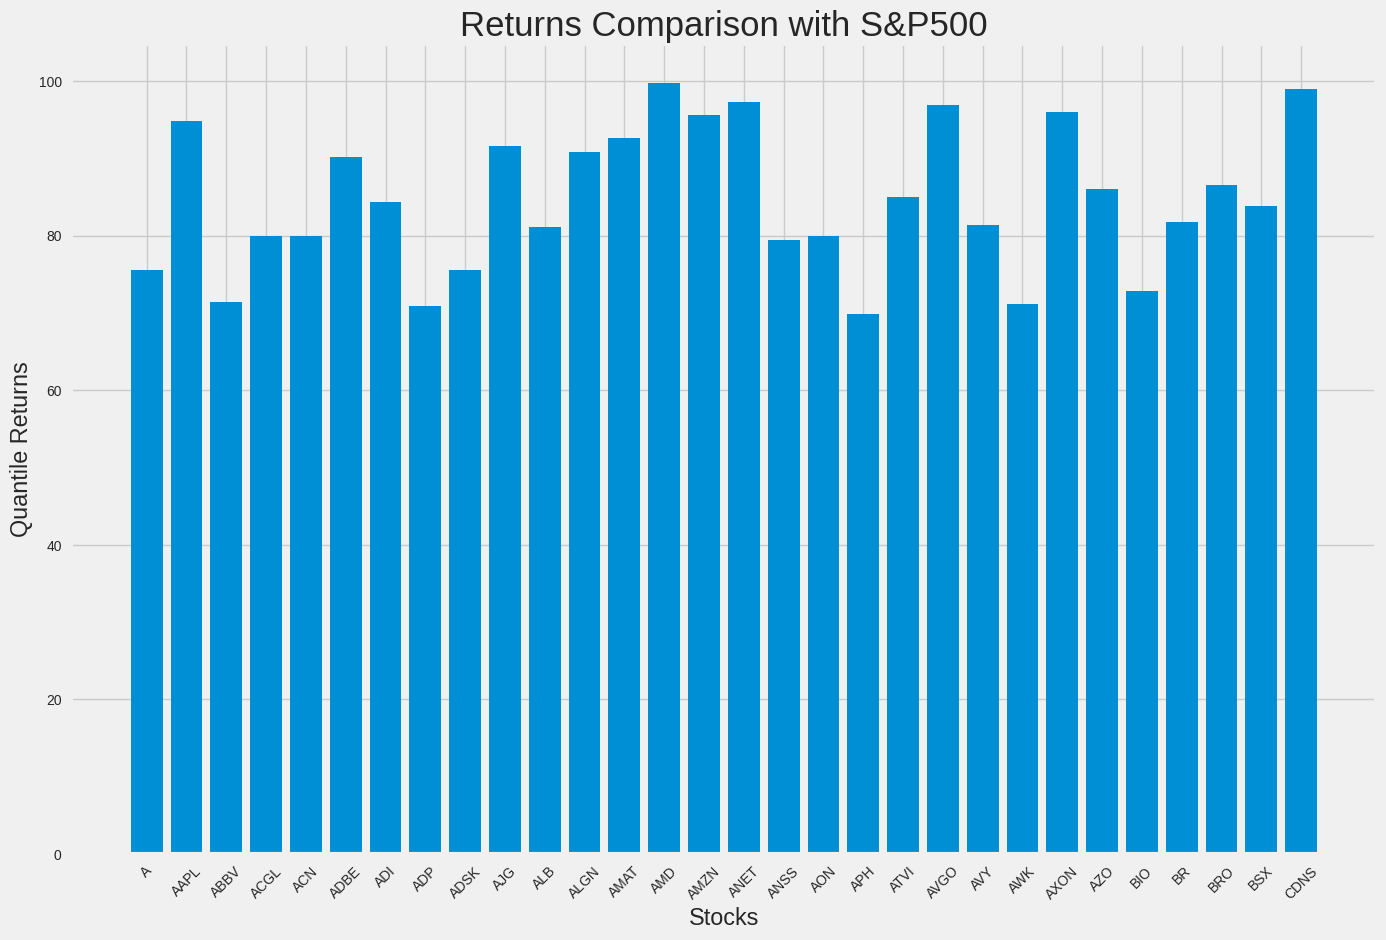

In [97]:
plt.figure(figsize = (15, 10))
plt.bar(best_performers['Ticker'][0:30], best_performers['Score'][0:30])
plt.title('Returns Comparison with S&P500', fontsize = 25)
plt.xticks(rotation = 45)
plt.xlabel("Stocks")
plt.ylabel("Quantile Returns")
# plt.savefig('figures/Returns_comparisons_30.png')
# plt.savefig('figures/Returns_comparisons_30.pdf')
plt.show()

**04 Portfolio**

**Conditions**
- condition_1 = latest_price > moving_average_150 > moving_average_200
- condition_4 = pe_ratio < 40
Picked the stocks meeting the above two conditions

**Optimization**
- Optimized the returns based on best sharpe ratio using pyportfolio opt library
- Used EfficientFrontier, risk models and expected returns to optimize the stocks
- Optimized the weights of the stocks for maximum returns using DiscreteAllocation for a $15,000 initial investment
portfolio-1-optimized-stock-allocation.csv

**Result**
Expected annual return: 26.1%
Annual volatility: 16.6%
Sharpe Ratio: 1.46

In [103]:
!pip install cvxpy

!pip install cvxopt

!pip install PyPortfolioOpt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.5 MB/s eta 0:00:00


In [104]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# data sources and analysis
import pandas as pd
from yahoo_fin import stock_info as si
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import seaborn as sns

# Portfolio Optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [99]:
## Reading the best performers from the Database
best_performers = pd.read_csv('best_performers.csv')
best_performers.head()

## Initializing the final_df DataFrame
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'PE_Ratio','PEG_Ratio','SMA_150', 'SMA_200', '52_week_low', '52_week_high'])


# We have to drop the peg ratio from our conditions because it was missing for some of the tickers and was giving error
# We could have pulled the beta value and make a condition out of it but due ti limitation of time couldn'e do it
for ticker in best_performers['Ticker']:
    try:
        df = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        moving_avg = [150, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        pe_ratio = float(si.get_quote_table(ticker)['PE Ratio (TTM)'])
#         peg_ratio = float(si.get_stats_valuation(ticker)[1][4])
        moving_average_150 = df['SMA_150'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])
            
        # Conditions
        condition_1 = latest_price > moving_average_150 > moving_average_200
        condition_2 = latest_price >= (1.3 * low_52week)
        condition_3 = latest_price >= (0.75 * high_52week)
        condition_4 = pe_ratio < 40
#         condition_5 = peg_ratio < 2
            
        # Conditional
        if condition_1 and condition_4:            #condition_1 and condition_2 and condition_3 and 
            final_df = final_df.append({'Tickers': ticker,
                                        'Latest_Price': latest_price,
                                        'Score': score,
                                        'PE_Ratio': pe_ratio,
#                                         'PEG_Ratio': peg_ratio,
                                        'SMA_150': moving_average_150,
                                        'SMA_200': moving_average_200,
                                        '52_week_low': low_52week,
                                        '52_week_high': high_52week}, 
                                         ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")

final_df.sort_values(by = 'Score', ascending = False)
pd.set_option('display.max_columns', 10)
final_df.to_csv('portfolio/portfolio1-SMA-PE.csv')
final_df


# Visually show the stock Portfolio
title = 'Portfolio Adj. Close Price History for Portfolio 1'

# Get the tickers for our Portfolio
my_stocks = final_df['Tickers']

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in my_stocks:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(my_stocks, loc = 'upper left')
plt.savefig('figures/portfolio_1.png')
plt.savefig('figures/portfolio_1.pdf')
plt.show()

# show the daily simple returns
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']
    portfolio_returns[ticker] = df2['Adj Close'].pct_change().dropna()
portfolio_returns.head()


# Making a heat map representing the correlation matrix
plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 5}, vmax = 0.5)
plt.savefig('figures/portfolio_1_hm.png')
plt.savefig('figures/portfolio_1_hm.pdf')
plt.show()


# Create and show the annualized covariance matrix
cov_matrix_annual = portfolio_returns.cov() * 252
cov_matrix_annual


# Calculate the portfolio variance
# weights = np.full((1, 30), 0.033)
weights = np.empty(len(final_df)); weights.fill(1/len(final_df))
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

# Calculate portfolio Volatility aka Standard Deviation
port_volatility = np.sqrt(port_variance)
port_volatility


# Calculate annual portfolio returns
port_simple_annual_return = np.sum(portfolio_returns.mean() * weights) * 252
port_simple_annual_return


# Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_volatility = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(port_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual Volatility / Risk: '+ percent_volatility)
print('Annual Variance: '+ percent_var)


from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: '+ str(allocation))
print('Funds Remaining: ${:.2f}'.format(leftover))


# Visually show the stock Portfolio
title = 'Final Portfolio Adj. Close Price History for Portfolio 1'

# Get the tickers for our Portfolio
stocks_to_invest = list()
for i in allocation.keys():
    stocks_to_invest.append(i)
stocks_to_invest

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in stocks_to_invest:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Normalized Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(stocks_to_invest, loc = 'upper left')
plt.savefig('figures/portfolio_1_optimized.png')
plt.savefig('figures/portfolio_1_optimized.pdf')
plt.show()

# Saving the Stock Allocation to csv
data_items = allocation.items()
data_list = list(data_items)
stocks_to_invest_with_allocation = pd.DataFrame(data_list, columns = ['Tickers', 'Allocation'])

stocks_to_invest_with_allocation.to_csv('portfolio/portfolio-1-optimized-stock-allocation.csv', index = None)

# show the daily simple returns
final_portfolio = pd.DataFrame()
final_portfolio_returns = pd.DataFrame()
for ticker in stocks_to_invest:
    df3 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    final_portfolio[ticker] = df3['Adj Close']
    final_portfolio_returns[ticker] = df3['Adj Close'].pct_change().dropna()
final_portfolio_returns



# Making a heat map representing the correlation matrix
title1 = "Correlation Matrix for Portfolio 1"

plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(final_portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 15}, vmax = 0.5)
plt.title(title1, fontsize = 22)
plt.savefig('figures/optimized_portfolio_1_hm.png')
plt.savefig('figures/optimized_portfolio_1_hm.pdf')
plt.show()

ModuleNotFoundError: ignored

**05 - Portfolio 2 - SMA - Low of 52 Week - High of 52 Week - PE ratio**

Conditions
- condition_1 = latest_price > moving_average_150 > moving_average_200
- condition_2 = latest_price >= (1.3 * low_52week)
- condition_3 = latest_price >= (0.75 * high_52week)
- condition_4 = pe_ratio < 40
Picked the stocks meeting the above four conditions

Optimization
- Optimized the returns based on best  sharpe ratio using pyportfolio opt library
- Used EfficientFrontier, risk models and expected returns to optimize the stocks
- Optimized the weights of the stocks for maximum returns using DiscreteAllocation for a $15,000 initial investment

In [ ]:
# Ignoring Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# data sources and analysis
import pandas as pd
from yahoo_fin import stock_info as si
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import seaborn as sns

# Portfolio Optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

## Reading the best performers from the Database
best_performers = pd.read_csv('best_performers.csv')
best_performers.head()

## Initializing the final_df DataFrame
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'PE_Ratio','PEG_Ratio','SMA_150', 'SMA_200', '52_week_low', '52_week_high'])

# We have to drop the peg ratio from our conditions because it was missing for some of the tickers and was giving error
# We could have pulled the beta value and make a condition out of it but due ti limitation of time couldn'e do it
for ticker in best_performers['Ticker']:
    try:
        df = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        moving_avg = [150, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        pe_ratio = float(si.get_quote_table(ticker)['PE Ratio (TTM)'])
#         peg_ratio = float(si.get_stats_valuation(ticker)[1][4])
        moving_average_150 = df['SMA_150'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])
            
        # Conditions
        condition_1 = latest_price > moving_average_150 > moving_average_200
        condition_2 = latest_price >= (1.3 * low_52week)
        condition_3 = latest_price >= (0.75 * high_52week)
        condition_4 = pe_ratio < 40
#         condition_5 = peg_ratio < 2
            
        # Conditional
        if condition_1 and condition_2 and condition_3 and condition_4:             
            final_df = final_df.append({'Tickers': ticker,
                                        'Latest_Price': latest_price,
                                        'Score': score,
                                        'PE_Ratio': pe_ratio,
#                                         'PEG_Ratio': peg_ratio,
                                        'SMA_150': moving_average_150,
                                        'SMA_200': moving_average_200,
                                        '52_week_low': low_52week,
                                        '52_week_high': high_52week}, 
                                         ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")

final_df.sort_values(by = 'Score', ascending = False)
pd.set_option('display.max_columns', 10)
final_df.to_csv('portfolio/portfolio2-SMA-low-high-PE.csv')
final_df

# Visually show the stock Portfolio
title = 'Portfolio Adj. Close Price History for Portfolio 2'

# Get the tickers for our Portfolio
my_stocks = final_df['Tickers']

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in my_stocks:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(my_stocks, loc = 'upper left')
plt.savefig('figures/portfolio_2.png')
plt.savefig('figures/portfolio_2.pdf')
plt.show()

# show the daily simple returns
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']
    portfolio_returns[ticker] = df2['Adj Close'].pct_change().dropna()
portfolio_returns.head()

# Making a heat map representing the correlation matrix
plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 5}, vmax = 0.5)
plt.savefig('figures/portfolio_2_hm.png')
plt.savefig('figures/portfolio_2_hm.pdf')
plt.show()


# Create and show the annualized covariance matrix
cov_matrix_annual = portfolio_returns.cov() * 252
cov_matrix_annual

# Calculate the portfolio variance
# weights = np.full((1, 30), 0.033)
weights = np.empty(len(final_df)); weights.fill(1/len(final_df))
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

# Calculate portfolio Volatility aka Standard Deviation
port_volatility = np.sqrt(port_variance)
port_volatility

# Calculate annual portfolio returns
port_simple_annual_return = np.sum(portfolio_returns.mean() * weights) * 252
port_simple_annual_return

# Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_volatility = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(port_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual Volatility / Risk: '+ percent_volatility)
print('Annual Variance: '+ percent_var)

# Portfolio Optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: '+ str(allocation))
print('Funds Remaining: ${:.2f}'.format(leftover))

# Visually show the stock Portfolio
title = 'Final Portfolio Adj. Close Price History for Portfolio 2'

# Get the tickers for our Portfolio
stocks_to_invest = list()
for i in allocation.keys():
    stocks_to_invest.append(i)
stocks_to_invest

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in stocks_to_invest:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Normalized Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(stocks_to_invest, loc = 'upper left')
plt.savefig('figures/portfolio_2_optimized.png')
plt.savefig('figures/portfolio_2_optimized.pdf')
plt.show()


# Saving the Stock Allocation to csv
data_items = allocation.items()
data_list = list(data_items)
stocks_to_invest_with_allocation = pd.DataFrame(data_list, columns = ['Tickers', 'Allocation'])
stocks_to_invest_with_allocation.to_csv('portfolio/portfolio-2-optimized-stock-allocation.csv', index = None)

# show the daily simple returns
final_portfolio = pd.DataFrame()
final_portfolio_returns = pd.DataFrame()
for ticker in stocks_to_invest:
    df3 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    final_portfolio[ticker] = df3['Adj Close']
    final_portfolio_returns[ticker] = df3['Adj Close'].pct_change().dropna()
final_portfolio_returns

# Making a heat map representing the correlation matrix
title1 = "Correlation Matrix for Portfolio 2"

plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(final_portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 15}, vmax = 0.5)
plt.title(title1, fontsize = 22)
plt.savefig('figures/optimized_portfolio_2_hm.png')
plt.savefig('figures/optimized_portfolio_2_hm.pdf')
plt.show()

06 - Portfolio 3 - Low of 52 Week - High of 52 Week - PE ratio
Conditions
condition_2 = latest_price >= (1.3 * low_52week)
condition_3 = latest_price >= (0.75 * high_52week)
condition_4 = pe_ratio < 40
Picked the stocks meeting the above three conditions

Optimization
Optimized the returns based on best sharpe ratio using pyportfolio opt library
Used EfficientFrontier, risk models and expected returns to optimize the stocks
Optimized the weights of the stocks for maximum returns using DiscreteAllocation for a $15,000 initial investment

In [ ]:
# Ignoring Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# data sources and analysis
import pandas as pd
from yahoo_fin import stock_info as si
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import seaborn as sns

# Portfolio Optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

## Reading the best performers from the Database
best_performers = pd.read_csv('best_performers.csv')
best_performers.head()


## Initializing the final_df DataFrame
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'PE_Ratio','PEG_Ratio','SMA_150', 'SMA_200', '52_week_low', '52_week_high'])

# We have to drop the peg ratio from our conditions because it was missing for some of the tickers and was giving error
# We could have pulled the beta value and make a condition out of it but due ti limitation of time couldn'e do it
for ticker in best_performers['Ticker']:
    try:
        df = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        moving_avg = [150, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        pe_ratio = float(si.get_quote_table(ticker)['PE Ratio (TTM)'])
#         peg_ratio = float(si.get_stats_valuation(ticker)[1][4])
        moving_average_150 = df['SMA_150'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])
            
        # Conditions
        condition_1 = latest_price > moving_average_150 > moving_average_200
        condition_2 = latest_price >= (1.3 * low_52week)
        condition_3 = latest_price >= (0.75 * high_52week)
        condition_4 = pe_ratio < 40
#         condition_5 = peg_ratio < 2
            
        # Conditional
        if condition_2 and condition_3 and condition_4:            #condition_1 and condition_2 and condition_3 and 
            final_df = final_df.append({'Tickers': ticker,
                                        'Latest_Price': latest_price,
                                        'Score': score,
                                        'PE_Ratio': pe_ratio,
#                                         'PEG_Ratio': peg_ratio,
                                        'SMA_150': moving_average_150,
                                        'SMA_200': moving_average_200,
                                        '52_week_low': low_52week,
                                        '52_week_high': high_52week}, 
                                         ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")

final_df.sort_values(by = 'Score', ascending = False)
pd.set_option('display.max_columns', 10)
final_df.to_csv('portfolio/portfolio3-low-high-PE.csv')
final_df

# Visually show the stock Portfolio
title = 'Portfolio Adj. Close Price History for Portfolio 3'

# Get the tickers for our Portfolio
my_stocks = final_df['Tickers']

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in my_stocks:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(my_stocks, loc = 'upper left')
plt.savefig('figures/portfolio_3.png')
plt.savefig('figures/portfolio_3.pdf')
plt.show()

# show the daily simple returns
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']
    portfolio_returns[ticker] = df2['Adj Close'].pct_change().dropna()
portfolio_returns.head()


# Making a heat map representing the correlation matrix
plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 5}, vmax = 0.5)
plt.savefig('figures/portfolio_3_hm.png')
plt.savefig('figures/portfolio_3_hm.pdf')
plt.show()


# Create and show the annualized covariance matrix
cov_matrix_annual = portfolio_returns.cov() * 252
cov_matrix_annual

# Calculate the portfolio variance
# weights = np.full((1, 30), 0.033)
weights = np.empty(len(final_df)); weights.fill(1/len(final_df))
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

# Calculate portfolio Volatility aka Standard Deviation
port_volatility = np.sqrt(port_variance)
port_volatility

# Calculate annual portfolio returns
port_simple_annual_return = np.sum(portfolio_returns.mean() * weights) * 252
port_simple_annual_return

# Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_volatility = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(port_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual Volatility / Risk: '+ percent_volatility)
print('Annual Variance: '+ percent_var)




from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: '+ str(allocation))
print('Funds Remaining: ${:.2f}'.format(leftover))

# Visually show the stock Portfolio
title = 'Final Portfolio Adj. Close Price History for Portfolio 3'

# Get the tickers for our Portfolio
stocks_to_invest = list()
for i in allocation.keys():
    stocks_to_invest.append(i)
stocks_to_invest

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in stocks_to_invest:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Normalized Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(stocks_to_invest, loc = 'upper left')
plt.savefig('figures/portfolio_3_optimized.png')
plt.savefig('figures/portfolio_3_optimized.pdf')
plt.show()


# Saving the Stock Allocation to csv
data_items = allocation.items()
data_list = list(data_items)
stocks_to_invest_with_allocation = pd.DataFrame(data_list, columns = ['Tickers', 'Allocation'])
stocks_to_invest_with_allocation.to_csv('portfolio/portfolio-3-optimized-stock-allocation.csv', index = None)

# show the daily simple returns
final_portfolio = pd.DataFrame()
final_portfolio_returns = pd.DataFrame()
for ticker in stocks_to_invest:
    df3 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    final_portfolio[ticker] = df3['Adj Close']
    final_portfolio_returns[ticker] = df3['Adj Close'].pct_change().dropna()
final_portfolio_returns

# Making a heat map representing the correlation matrix
title1 = "Correlation Matrix for Portfolio 3"

plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(final_portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 15}, vmax = 0.5)
plt.title(title1, fontsize = 22)
plt.savefig('figures/optimized_portfolio_3_hm.png')
plt.savefig('figures/optimized_portfolio_3_hm.pdf')
plt.show()

**7 - Portfolio 4 - SMA - Low of 52 Week - High of 52 Week**
Conditions
condition_1 = latest_price > moving_average_150 > moving_average_200
condition_2 = latest_price >= (1.3 * low_52week)
condition_3 = latest_price >= (0.75 * high_52week)
Picked the stocks meeting the above three conditions

Optimization
Optimized the returns based on best sharpe ratio using pyportfolio opt library
Used EfficientFrontier, risk models and expected returns to optimize the stocks
Optimized the weights of the stocks for maximum returns using DiscreteAllocation for a $15,000 initial investment

In [ ]:
# Ignoring Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# data sources and analysis
import pandas as pd
from yahoo_fin import stock_info as si
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import seaborn as sns

# Portfolio Optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


## Reading the best performers from the Database
best_performers = pd.read_csv('best_performers.csv')
best_performers.head()

## Initializing the final_df DataFrame
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'PE_Ratio','PEG_Ratio','SMA_150', 'SMA_200', '52_week_low', '52_week_high'])


# We have to drop the peg ratio from our conditions because it was missing for some of the tickers and was giving error
# We could have pulled the beta value and make a condition out of it but due ti limitation of time couldn'e do it
for ticker in best_performers['Ticker']:
    try:
        df = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        moving_avg = [150, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        pe_ratio = float(si.get_quote_table(ticker)['PE Ratio (TTM)'])
#         peg_ratio = float(si.get_stats_valuation(ticker)[1][4])
        moving_average_150 = df['SMA_150'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])
            
        # Conditions
        condition_1 = latest_price > moving_average_150 > moving_average_200
        condition_2 = latest_price >= (1.3 * low_52week)
        condition_3 = latest_price >= (0.75 * high_52week)
        condition_4 = pe_ratio < 40
#         condition_5 = peg_ratio < 2
            
        # Conditional
        if condition_1 and condition_2 and condition_3:            #condition_1 and condition_2 and condition_3 and 
            final_df = final_df.append({'Tickers': ticker,
                                        'Latest_Price': latest_price,
                                        'Score': score,
                                        'PE_Ratio': pe_ratio,
#                                         'PEG_Ratio': peg_ratio,
                                        'SMA_150': moving_average_150,
                                        'SMA_200': moving_average_200,
                                        '52_week_low': low_52week,
                                        '52_week_high': high_52week}, 
                                         ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")

final_df.sort_values(by = 'Score', ascending = False)
pd.set_option('display.max_columns', 10)
final_df.to_csv('portfolio/portfolio4-SMA-low-high.csv')
final_df

# Visually show the stock Portfolio
title = 'Portfolio Adj. Close Price History for Portfolio 4'

# Get the tickers for our Portfolio
my_stocks = final_df['Tickers']

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in my_stocks:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(my_stocks, loc = 'upper left')
plt.savefig('figures/portfolio_4.png')
plt.savefig('figures/portfolio_4.pdf')
plt.show()


# show the daily simple returns
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']
    portfolio_returns[ticker] = df2['Adj Close'].pct_change().dropna()
portfolio_returns.head()

# Making a heat map representing the correlation matrix
plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 5}, vmax = 0.5)
plt.savefig('figures/portfolio_4_hm.png')
plt.savefig('figures/portfolio_4_hm.pdf')
plt.show()

# Create and show the annualized covariance matrix
cov_matrix_annual = portfolio_returns.cov() * 252
cov_matrix_annual


# Calculate the portfolio variance
# weights = np.full((1, 30), 0.033)
weights = np.empty(len(final_df)); weights.fill(1/len(final_df))
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance


# Calculate portfolio Volatility aka Standard Deviation
port_volatility = np.sqrt(port_variance)
port_volatility

# Calculate annual portfolio returns
port_simple_annual_return = np.sum(portfolio_returns.mean() * weights) * 252
port_simple_annual_return

# Show the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_volatility = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(port_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual Volatility / Risk: '+ percent_volatility)
print('Annual Variance: '+ percent_var)

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: '+ str(allocation))
print('Funds Remaining: ${:.2f}'.format(leftover))


# Visually show the stock Portfolio
title = 'Final Portfolio Adj. Close Price History for Portfolio 4'

# Get the tickers for our Portfolio
stocks_to_invest = list()
for i in allocation.keys():
    stocks_to_invest.append(i)
stocks_to_invest

# Create and plot the graph
plt.figure(figsize=(12, 10), dpi=80)
for ticker in stocks_to_invest:
    df1 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    plt.plot(df1['Normalized Adj Close'], label = ticker)

plt.title(title, fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj Price USD ($)', fontsize = 18)
plt.legend(stocks_to_invest, loc = 'upper left')
plt.savefig('figures/portfolio_4_optimized.png')
plt.savefig('figures/portfolio_4_optimized.pdf')
plt.show()


# Saving the Stock Allocation to csv
data_items = allocation.items()
data_list = list(data_items)
stocks_to_invest_with_allocation = pd.DataFrame(data_list, columns = ['Tickers', 'Allocation'])

stocks_to_invest_with_allocation.to_csv('portfolio/portfolio-4-optimized-stock-allocation.csv', index = None)


# show the daily simple returns
final_portfolio = pd.DataFrame()
final_portfolio_returns = pd.DataFrame()
for ticker in stocks_to_invest:
    df3 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    final_portfolio[ticker] = df3['Adj Close']
    final_portfolio_returns[ticker] = df3['Adj Close'].pct_change().dropna()
final_portfolio_returns


# Making a heat map representing the correlation matrix
title1 = "Correlation Matrix for Portfolio 1"

plt.figure(figsize = (12, 10))
sns.set(font_scale = 1.4)
sns.heatmap(final_portfolio_returns.corr(), cmap = "Reds", annot = True, annot_kws = {"size": 15}, vmax = 0.5)
plt.title(title1, fontsize = 22)
plt.savefig('figures/optimized_portfolio_4_hm.png')
plt.savefig('figures/optimized_portfolio_4_hm.pdf')
plt.show()


